In [34]:
import numpy as np
from scipy import stats
import pymc3 as pm
import matplotlib.pyplot as plt
import theano.tensor as tt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [185]:
np.random.seed(4)
mean_t_neighbors = np.random.normal(loc=6, scale=1, size=(200, 1))
true_alpha = 0.3
true_beta = -1.
true_sigma = 0.1
lifetime = true_alpha * mean_t_neighbors - true_beta + true_sigma * np.random.normal(size=(200, 1))

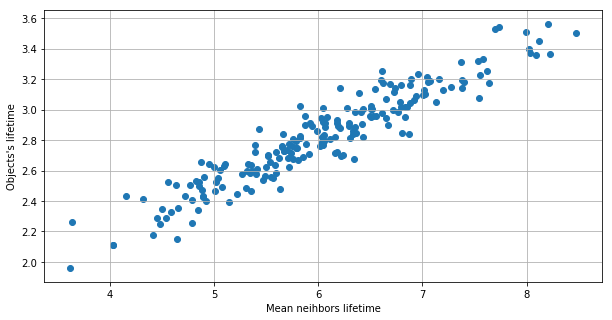

In [186]:
# Модельная зависимость времени жизни объекта от среднего времени жизни его соседей
plt.figure(figsize=(10, 5))
plt.scatter(mean_t_neighbors, lifetime)
plt.grid()
plt.ylabel("Objects's lifetime")
plt.xlabel("Mean neihbors lifetime");

In [176]:
with pm.Model() as model:
    # Задаем априорные распределения на параметры модели
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    beta = pm.Normal('beta', 0, sd=20)
    alpha = pm.Normal('alpha', 0, sd=20)
    
    # Задаем линейную модель
    likelihood = pm.Normal('y', mu=beta + alpha * mean_t_neighbors,
                        sd=sigma, observed=lifetime)

In [177]:
# Проводим Inference
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=1000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
>Metropolis: [sigma]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:07<00:00, 5933.52draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [183]:
# Получчаем апостериорные распределения на параметры модели
alpha = trace['alpha']
beta = trace['beta']
sigma = trace['sigma']

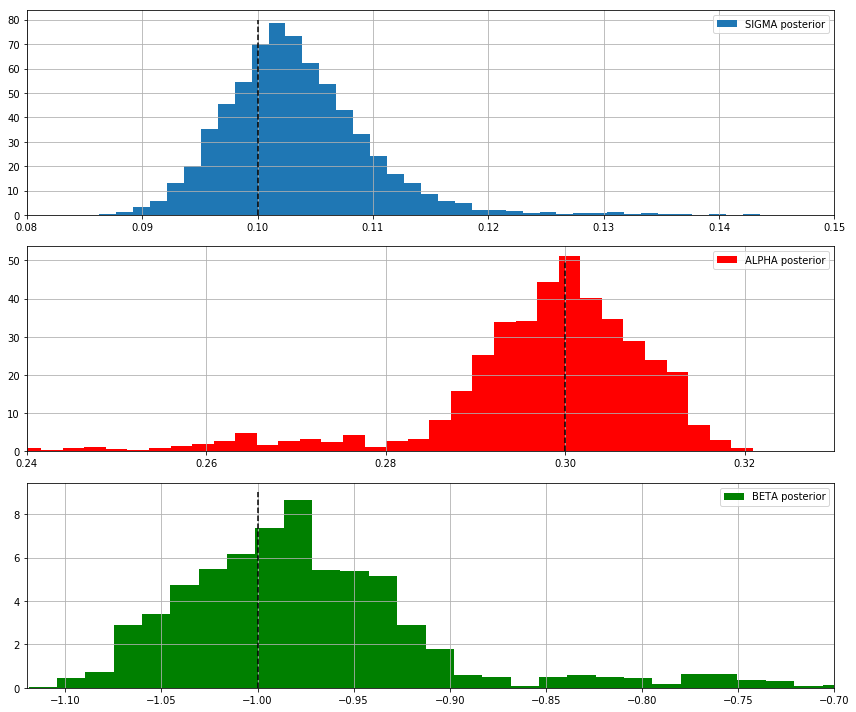

In [215]:
plt.figure(figsize=(12, 10))

plt.subplot(311)
plt.hist(sigma, bins=50, 
         label="SIGMA posterior", normed=True)
plt.vlines(true_sigma, 0, 80, linestyle='--')
plt.grid()
plt.xlim(0.08, 0.15)
plt.legend()

plt.subplot(312)
plt.hist(alpha, bins=50, color='red',
         label="ALPHA posterior", normed=True)
plt.vlines(true_alpha, 0, 50, linestyle='--')
plt.grid()
plt.xlim(0.24, 0.33)
plt.legend()

plt.subplot(313)
plt.hist(beta, bins=50, color='green',
         label="BETA posterior", normed=True)
plt.vlines(true_beta, 0, 9, linestyle='--')
plt.grid()
plt.xlim(-1.12, -0.7)
plt.legend()

plt.tight_layout();